# Fitting Data with Scipy

## Why Scipy?

Scipy is a Python library that contains a variety of very useful mathematical algorithms and common data processing functions. It is a great tool for manipulating and visualizing data efficiently. Scipy and numpy go hand in hand. Most of the data processing you will do will probably involve one if not both of these libraries. Scipy is a great base for most types of scientific coding, and is complemented by numerous modules available for specific sub fields or tasks (ie: astropy, scikit-learn, pandas, etc). 

Scipy is organized into a subpackages containing functions to perform various high level tasks with your data. The subpackages are listed below:

| Subpackage  |      Description      |  |Subpackage | Description |
|----------|:-------------:| ---| ---| --- |
| **cluster** |  Clustering algorithms | | **odr** | Orthogonal distance regression |
| **constants** |   Physical and mathematical constants   | | **optimize** | Optimization and root-finding routines |
| **fftpack**| Fast Fourier Transform routines | | **signal** | Signal processing |
| **integrate** | Integration and ordinary differential equation solvers | | **sparse** | Sparse matrices and associated routines |
| **interpolate** | Interpolation and smoothing splines | | **spatial** | Spatial data structures and algorithms |
| **io** | 	Input and output | | **special** | Special functions |
| **linalg** | Linear algebra | | **stats** | Statistical distributions and functions |
| **ndimage** | N-dimensional image processing |

We don't have nearly enough time to conver all of scipy in a single tutorial, so we are going to focus on a obe of the subpackages that I find most useful and use all the time - **optimize**.







## A Brief Look at Scipy's *Optimize* Library
### Basic Curve Fitting
When you know the form your data should take, it is relatively straight forward to fit a curve to the data. The **scipy.optimize.curve_fit** function will find a best fit curve for the data that is input. However, you must already know the general form of the equation to fit to your data and create a function containing this information to use this function. The **curve_fit** finds the best set of coefficients or paramaters based on the function you provide using a least squares minimization - it finds the coefficient values for a curve with the smallest sum of the offsets or residuals of points from the curve.

This means that if you're data is sinusoidal and you in put an exponential function, **curve_fit** will return the exponential curve that fits your data *best* - but it will probably be a terrible fit! You are resonsible for inputting a reasonable function when using this method. **curve_fit** is great when you want a model of your data to understand the basic relationship and be able to predict points efficiently. It is not the best choice when you do not know the general form of your data, or otherwise need to find the best possibe fit of any form.

We will walk through an example of fitting an exponential curve to some data. 

First, let's load numpy to create our data, matplotlib.pyplot to plot everything, and scipy.optimize.curve_fit.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

We can create some exponential data of the form a*np.exp(b*x) and use the random number function in numpy to add noise to our data. We'll take a look at the data using pyplot.

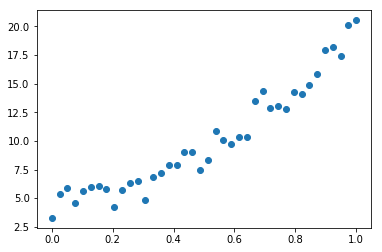

In [58]:
#Get x values
x = np.linspace(0, 1, num = 40) 
#Get y values - noisy exponential
y = 4.3 * np.exp(1.5 * x) + np.random.normal(size = 40) 

plt.plot(x,y,'o')

**curve_fit** takes 3 required arguments:
    - f: the function you want curve_fit to find the best coefficient values for 
    - xdata: a 1d array containing the data x values
    - ydata: a 1d array containing the y values
There are a number of optional keyword arguments that can be used to specify certain behaviors, for example setting bounds on the paramater values. Here, we are going to leave these as the default values, but you can see all of the available options in the documentation, [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

The first thing we need to do is define the function f. It should take the 1d array of x values as it's first argument, and each of the coefficients you want fit as the remaining arguments. f can have as many coefficients as necessary.

In our case, we know we want to fit an exponential curve of the form a*np.exp(b*x), so our function can be defined as follows:

In [61]:
# Function form for curve fit
def f(x, a, b): 
    return a*np.exp(b*x) 

Now we can input this into **curve_fit**. There are two values returned, so we have two variables on the left hand side of the function call, **coeff** and **coeff_cov**. The first is a 1d array with the optimized coefficeint values. We only asked the function to fit two coefficients, a and b, so our array has 2 values, [a b]. The second return gives the estimated covariance for each paramater, as a list of lists. The first list corresponds to paramater a and the second to b.

In [63]:
coeff, coeff_cov = curve_fit(f, x, y) 
print('Coefficients:')
print(coeff)
print('Covariance:')
print(coeff_cov)

Coefficients:
[4.14146068 1.57237562]
Covariance:
[[ 0.03204184 -0.00951985]
 [-0.00951985  0.00311852]]


We can now create an array that contains the y values of our exponential function with the optimized coefficients for each of the x values:

In [67]:
#a*np.exp(b*x)
curve_y = coeff[0]*np.exp(coeff[1]*x)

In [69]:
curve_y

array([ 4.14146068,  4.31184493,  4.48923898,  4.67393121,  4.86622188,
        5.0664236 ,  5.27486184,  5.49187546,  5.71781726,  5.95305456,
        6.19796977,  6.45296107,  6.71844299,  6.99484712,  7.28262283,
        7.58223795,  7.89417956,  8.21895479,  8.55709164,  8.9091398 ,
        9.27567162,  9.65728296, 10.0545942 , 10.46825127, 10.89892665,
       11.34732048, 11.81416173, 12.30020935, 12.80625349, 13.33311685,
       13.88165595, 14.45276255, 15.04736511, 15.66643026, 16.31096444,
       16.98201547, 17.68067427, 18.40807667, 19.16540519, 19.95389105])

We see how well we fit the data by plotting the curve on top of the data.

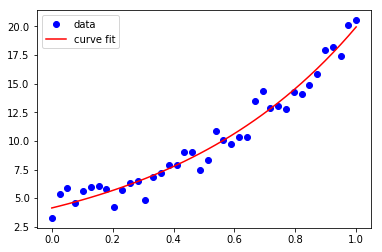

In [68]:
#Plot the data and the curve fit
plt.plot(x, y, 'o', color ='b', label ="data") 
plt.plot(x, curve_y, '-', color ='r', label ="curve fit") 
plt.legend() 

### Other Optimizations
There are all sorts of other things you can do with optimize - non linear least squares optimization, global search for the minimum, root finding, etc. Any standard mathematical optimization can probably be done with scipy - your job will be to figure out which one is right for your data. Once you know that, the scipy documentation is really great and should be able to walk you through that optimization.

## Scipy Interpolate
A common thing you will need to do (especially if you work with spectra) is to resample your data using spline interpolation. There are several functions which can accomplish this with relative ease in **scipy.interpolate**. We will focus on the simplest - for univariate spline interpolation in 1d, called **interp1d**.

Basically this is a way to re-sample our data at any new x positions that we need. **interp1d** will calculate the most likely new y value for each new x value we give it. 

We'll start by defining some data points - again we use an exponential for simplicity.

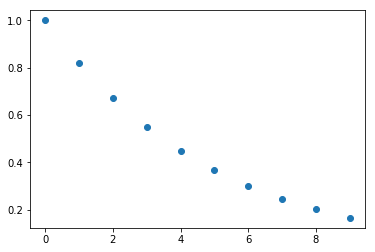

In [73]:
#X from 1 to 10
x = np.arange(0, 10)
#Get y values
y = np.exp(-x/5.0)
plt.plot(x,y,'o')

We use interp1d to get f - this is an object that acts much like a mathematical function. You can input a new x value and f will return the expected y value.

In [74]:
from scipy import interpolate
f = interpolate.interp1d(x, y)

Now, we simply need to define what our new x values will be and input them into our spline, f:

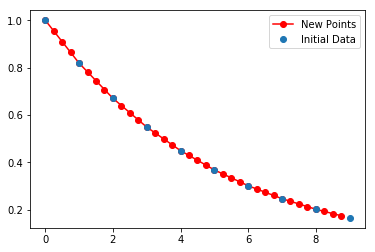

In [79]:
xnew = np.arange(0, 9, 0.25)
ynew = f(xnew) #Input new x's into f
plt.plot(xnew,ynew,'r', marker='o', label='New Points')
plt.plot(x,y,'o', label='Initial Data')
plt.legend()

As you can see from the plot, **interp1d** has filled in data points at x values that did not originially exist in our data (all of the red dots). The points that already existed kept their exact value. This is a very basic 1d spline.

## Scipy is Useful!
These are two basic, yet very common uses of scipy - but it's capabilities extend far beyond what we can cover in this tutorial. Whenever you need to do any standard mathematical optimization or data processes, I suggest you first look to see if there is already a function in scipy that can accomplish what you need. When there isn't, it's often something highly specialized or field dependent, and you may find it in a library or module that's tied to your specific area of science or data type. Google is your friend, take advantage of the extensive amounts of documentation and open source code available to you. There's no need to re-invent the wheel if there's already code out there that is designed to do exactly what you need.